In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
from scipy import integrate
%matplotlib inline

# Лаболаторна робота №1 з випадкових процесів

## Завдання №1 

#### Генеруємо вибірку довільних значень в [a, b], будуємо діаграму


In [2]:
data = []
a = 0.01
b = 1.01
n = 2200
data = np.random.uniform(a, b, n)
data = np.sort(data)
data = [round(i,5) for i in data]

In [3]:
H0 = "Приймаємо Н0 - вибірка має рівномірний розподіл"
H1 = "Відхиляємо Н0, приймаємо Н1 - Вибірка не має рівномірний розподіл"
k = int(1 + 3.3*math.log10(n))
print(k)

12


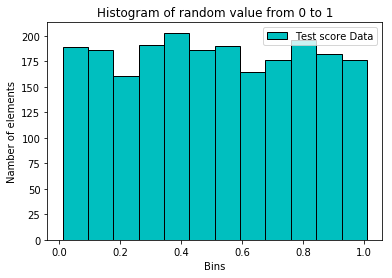

In [4]:
plt.title("Histogram of random value from 0 to 1")
plt.ylabel("Namber of elements")
plt.xlabel("Bins")
plt.hist(data, k, histtype='bar', align='mid', color='c', label='Test score Data',edgecolor='black')
plt.legend()
plt.show()

#### Знаходимо середнє та середньоквадратичне відхилення, а також парамнтри а_ та в_ для розподілу, та щільність розподілу f

In [5]:
average = round(np.sum(data)/n, 2)
print(average)
s = round(np.sqrt(np.sum((data-average)**2)/(n-1)), 2)
print(s)
v_x = round(s/average,2)
print(v_x)

0.51
0.29
0.57


In [6]:
a_v = round(average - s*1.73, 2)
b_v = round(average + s*1.73, 2)
f = round(1/(b_v-a_v), 2)
print(a_v, b_v, f)

0.01 1.01 1.0


#### Визначимо межі інтервалів та частоти


In [7]:
counts, bins = np.histogram(data, k)
p_observed = np.array(counts, dtype=float)
bins = [round(i,2) for i in bins]
bins[0], bins[len(bins)-1] = a_v, b_v
print(p_observed)
print(bins)

[189. 186. 161. 191. 203. 186. 190. 164. 176. 196. 182. 176.]
[0.01, 0.09, 0.18, 0.26, 0.34, 0.43, 0.51, 0.59, 0.68, 0.76, 0.84, 0.93, 1.01]


#### Визначимо теоретичні частоти


In [8]:
p_expected = []
for i in range(len(bins)-1):
    ex = round(n*f*(bins[i+1]-bins[i]), 5)
    p_expected.append(ex)
p_expected = np.array(p_expected)
print(p_expected)

[176. 198. 176. 176. 198. 176. 176. 198. 176. 176. 198. 176.]


#### Знаходимо хі(спостережуване) та ймовірність з якою наша має рівномірний розподіл

In [9]:
chi_test_value, probability_fit = sts.chisquare(p_observed, p_expected)
chi_test_value = round(chi_test_value, 2)
probability_fit = round(probability_fit, 2)
print("Ймовірність з якою наша має рівномірний розподіл:", probability_fit)

Ймовірність з якою наша має рівномірний розподіл: 0.16


#### Знаходимо хі(кретичне)

In [10]:
conf_interval = 0.95
df = len(bins) - 3
chi = sts.chi2.ppf(conf_interval, df) 
print("Рівень значущості: ",conf_interval)
print("Кількість степенів свободи: ", df)
print("хі_спостережуване: ", chi_test_value)
print("хі_кретичне: ", chi)

Рівень значущості:  0.95
Кількість степенів свободи:  10
хі_спостережуване:  15.46
хі_кретичне:  18.307038053275146


In [11]:
if (chi_test_value < chi):
    print("Відповідь: ", H0)
else: print("Відповідь: ", H1)

Відповідь:  Приймаємо Н0 - вибірка має рівномірний розподіл


## Завдання №2

#### Побудуємо рівномірний розподіл

In [12]:
a = 0
b = 100
uniform_rv = sts.uniform(a, b-a)
uniform_rv.rvs(100)

array([32.1244088 , 82.76318138, 25.76106113, 88.7398256 , 36.55944936,
       68.78220898, 84.65314298, 55.18636184, 81.6880064 ,  0.76816492,
       86.7807773 , 51.82659181, 82.09672761, 32.55718665, 59.96227364,
       15.65014565,  2.33312876, 72.34327266, 37.69227214, 98.36402723,
       87.50548955, 19.49760754, 56.89550265,  5.57815513, 83.05172818,
        6.04296694, 35.90187246, 65.08818934, 72.63213504, 97.94808393,
       20.72959247, 44.51763977, 98.62634383, 72.26892585, 81.40922278,
       40.3652504 , 13.50558396, 64.40207781, 67.66609001, 89.03223567,
       41.22550005, 94.86681688, 50.69808009, 22.65691562, 80.58118315,
       74.12701156, 73.89359619, 51.29184786,  8.83221742,  5.83893583,
       30.59445332, 36.42890225, 59.47922419, 54.52275828, 83.20358258,
       73.59616345, 29.82218986, 10.51586245, 29.98131164, 20.98668468,
        3.48986825, 37.86527743, 88.98670965, 98.78016107, 79.59115591,
       35.95692107, 79.9015023 , 85.21370769,  4.69481333, 46.27

Функція розподілу

Text(0.5,0,'$x$')

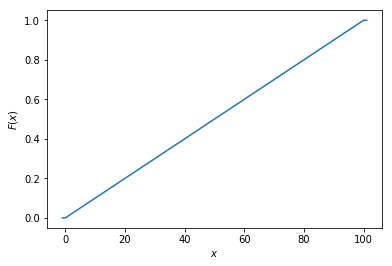

In [13]:
x = np.linspace(-1, 101 ,1000)
cdf = uniform_rv.cdf(x)
plt.plot(x, cdf)

plt.ylabel('$F(x)$')
plt.xlabel('$x$')

Щільність розподілу

Text(0.5,0,'$x$')

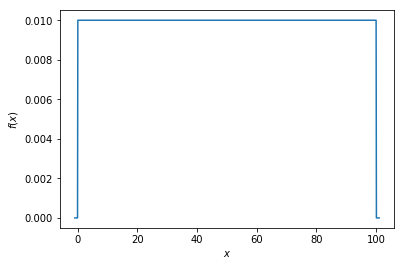

In [14]:
pdf = uniform_rv.pdf(x)
plt.plot(x, pdf)

plt.ylabel('$f(x)$')
plt.xlabel('$x$')

#### Визначимо функції

In [15]:
def fun_polinom(x):
    y = x**7 + x**5 + x**3
    return y
def fun_sinus(x1):
    y = 2*np.sin(2*x1)
    return y
def fun_racional(x2):
    y = 1/((x2+1)*np.sqrt(x2))
    return y


#### Визначимо функцію що обчислює інтеграл

In [16]:
def integrate_1(x1,x2,func,n=100000):
    x=np.linspace(x1,x2,1000)
    y1=0
    y2=max((func(x)))+1
    print("x_left = ",x1,"| x_right = ",x2,"| y_up = ",y1,"| y_down = ",y2)
    area=(x2-x1)*(y2-y1)
    check=[]
    xs=[]
    ys=[]
    for i in range(n):
        x=np.random.uniform(x1,x2,1)
        xs.append(x)
        y=np.random.uniform(y1,y2,1)
        ys.append(y)
        if abs(y)>abs(func(x)) or y<0:
            check.append(0)
        else:
            check.append(1)
    return(np.mean(check)*area,xs,ys,check)

x_left =  0 | x_right =  1 | y_up =  0 | y_down =  4.0
I =  0.538
x_left =  0 | x_right =  1 | y_up =  0 | y_down =  4.0


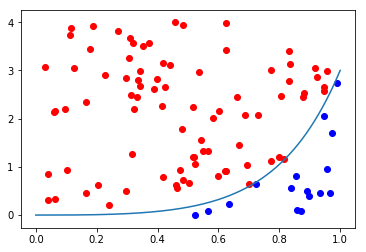

In [17]:
i_fun_polinom = integrate_1(0, 1, fun_polinom)[0]
print("I = ",round(i_fun_polinom,3))
_,x,y,c=integrate_1(0, 1, fun_polinom, n=100)
df=pd.DataFrame()
df['x']=x
df['y']=y
df['c']=c

x=np.linspace(0,1,1000)
plt.plot(x,fun_polinom(x))
plt.scatter(df[df['c']==0]['x'],df[df['c']==0]['y'],color='red')
plt.scatter(df[df['c']==1]['x'],df[df['c']==1]['y'],color='blue')
plt.show()

x_left =  0 | x_right =  3.141592653589793 | y_up =  0 | y_down =  2.999997527657195
I =  3.99
x_left =  0 | x_right =  3.141592653589793 | y_up =  0 | y_down =  2.999997527657195


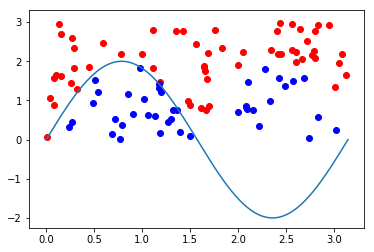

In [18]:
i_fun_sinus = integrate_1(0, np.pi, fun_sinus)[0]
print("I = ",round(i_fun_sinus,3))
_,x,y,c=integrate_1(0, np.pi, fun_sinus, n=100)
df=pd.DataFrame()
df['x']=x
df['y']=y
df['c']=c

x=np.linspace(0, np.pi,1000)
plt.plot(x,fun_sinus(x))
plt.scatter(df[df['c']==0]['x'],df[df['c']==0]['y'],color='red')
plt.scatter(df[df['c']==1]['x'],df[df['c']==1]['y'],color='blue')
plt.show()

x_left =  0.1 | x_right =  100 | y_up =  0 | y_down =  3.8747978728803445
I =  3.142
x_left =  0.1 | x_right =  3 | y_up =  0 | y_down =  3.8747978728803445


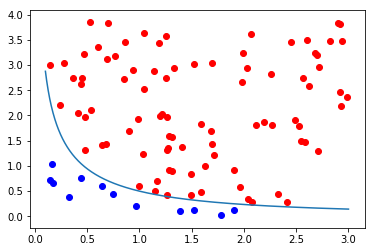

In [19]:
i_fun_racional = integrate_1(0.1, 100, fun_racional)[0]
#print("I = ",round(i_fun_racional,3))
invexp = lambda x2: 1/((x2+1)*np.sqrt(x2))
i_fun_rac, ccc = integrate.quad(invexp, 0, np.inf)
print("I = ",round(i_fun_rac, 3))
_,x,y,c=integrate_1(0.1, 3, fun_racional, n=100)
df=pd.DataFrame()
df['x']=x
df['y']=y
df['c']=c

x=np.linspace(0.1, 3,1000)
plt.plot(x,fun_racional(x))
plt.scatter(df[df['c']==0]['x'],df[df['c']==0]['y'],color='red')
plt.scatter(df[df['c']==1]['x'],df[df['c']==1]['y'],color='blue')
plt.show()

## Завдання №3

#### Генеруємо вибірку рівномірно розподілених значень в [a, b], будуємо діаграму

In [20]:
a = 0
b = 1
n = 1000
uniform_rv = sts.uniform(a, b-a)
u = []
i = 0
while i < n:
    u.append(max(uniform_rv.rvs(n)))
    i+=1


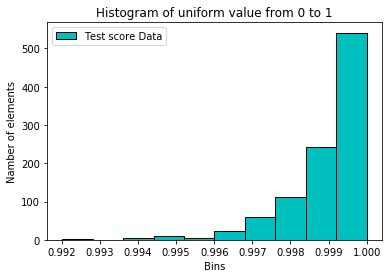

In [21]:
plt.title("Histogram of uniform value from 0 to 1")
plt.ylabel("Namber of elements")
plt.xlabel("Bins")
plt.hist(u,  histtype='bar', align='mid', color='c', label='Test score Data',edgecolor='black')
plt.legend()
plt.show()

#### Генеруємо вибірку нормально розподілених значень в M[x] = 0, sqrt(D[x])=1, будуємо діаграму

Побудуємо приклад нормальної вибірки

(array([ 1.,  3.,  4., 11., 23., 17., 23., 10.,  3.,  5.]),
 array([-2.68521051, -2.20916425, -1.73311799, -1.25707174, -0.78102548,
        -0.30497922,  0.17106704,  0.6471133 ,  1.12315956,  1.59920582,
         2.07525208]),
 <a list of 10 Patch objects>)

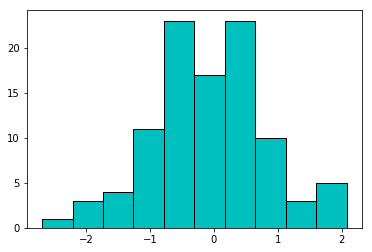

In [22]:
mu = 0
sigma = 1
norm_rv = sts.norm(loc=mu, scale=sigma)
en = []
i = 0
en_ = norm_rv.rvs(100)
while i < n:
    en.append(max(norm_rv.rvs(n)))
    i+=1
plt.hist(en_,  histtype='bar', align='mid', color='c', label='Test score Data',edgecolor='black')

Будуємо гістрограму максимумів

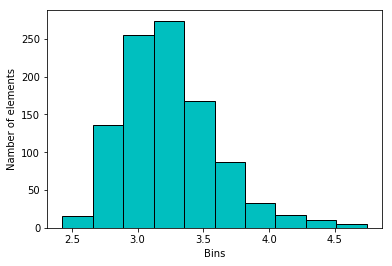

In [23]:
plt.ylabel("Namber of elements")
plt.xlabel("Bins")
plt.hist(en,  histtype='bar', align='mid', color='c', label='Test score Data',edgecolor='black')
plt.show()

## Завдання №4

#### Алгоритм А

In [24]:
def gaussian(u1,u2):
    z1 = np.sqrt(-2*np.log(u1))*np.cos(2*np.pi*u2)
    z2 = np.sqrt(-2*np.log(u1))*np.sin(2*np.pi*u2)
    return z1, z2

In [25]:
n = 1000
u1 = np.random.rand(n)
u2 = np.random.rand(n)
z1,z2 = gaussian(u1,u2)
z = []
for i in range(n):
    z.append(z1[i])
for i in range(n):
    z.append(z2[i])


Будуємо гауссівський позподіл за двома алгоритмами:

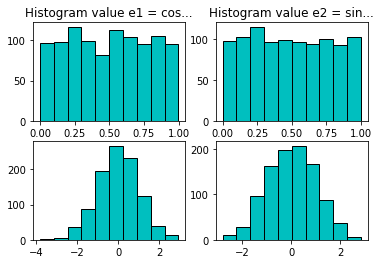

(array([  1.,   8.,  63., 192., 393., 515., 448., 265.,  94.,  21.]),
 array([-3.80065542, -3.1281049 , -2.45555438, -1.78300386, -1.11045334,
        -0.43790282,  0.2346477 ,  0.90719822,  1.57974875,  2.25229927,
         2.92484979]),
 <a list of 10 Patch objects>)

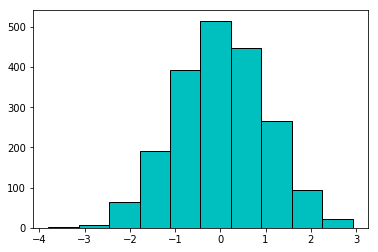

In [26]:
plt.figure()
plt.subplot(221)
plt.title("Histogram value e1 = cos...")
plt.hist(u1,  histtype='bar', align='mid', color='c', label='Test score Data',edgecolor='black') 
plt.subplot(222)
plt.title("Histogram value e2 = sin...")
plt.hist(u2,  histtype='bar', align='mid', color='c', label='Test score Data',edgecolor='black') 
plt.subplot(223) 
plt.hist(z1,  histtype='bar', align='mid', color='c', label='Test score Data',edgecolor='black') 
plt.subplot(224)
plt.hist(z2,  histtype='bar', align='mid', color='c', label='Test score Data',edgecolor='black') 
plt.show()
plt.hist(z,  histtype='bar', align='mid', color='c', label='Test score Data',edgecolor='black') 

#### Алгоритм В

In [27]:
def gaussian1(u):
    z = np.sqrt(12/n)*np.sum(u-0.5)
    return z

In [28]:
z = []
i = 0
while i < n:
    u = np.random.rand(10)
    z.append(gaussian1(u))
    i += 1

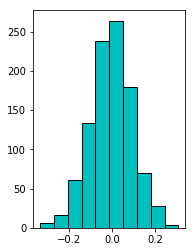

In [29]:
plt.figure()
plt.subplot(121)
plt.hist(z,  histtype='bar', align='mid', color='c', label='Test score Data',edgecolor='black') 
plt.show()

## Завдання №5

#### Алгоритм А

In [30]:
def drow():
    print("Гістограми при n = ", i)
    plt.hist(z,  histtype='bar', align='mid', color='c', label='Test score Data',edgecolor='black') 
    plt.show()

Гістограми при n =  3


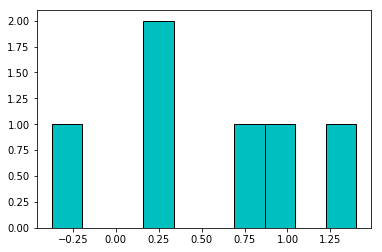

Гістограми при n =  12


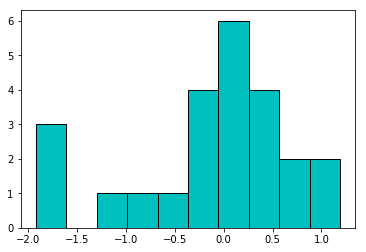

Гістограми при n =  48


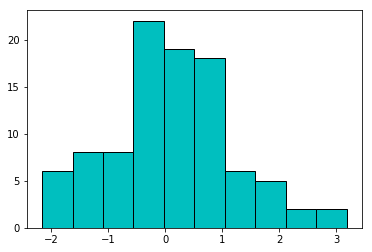

In [31]:
for i in (3, 12, 48):
    u1 = np.random.rand(i)
    u2 = np.random.rand(i)
    z1,z2 = gaussian(u1,u2)
    z = []
    for j in range(i):
        z.append(z1[j])
    for j in range(i):
        z.append(z2[j])
    drow()

#### Алгоритм B

In [32]:
def drow1(i):
    print("Гістограми при n = ", i)
    plt.figure()
    plt.subplot(121) 
    plt.hist(z,  histtype='bar', align='mid', color='c', label='Test score Data',edgecolor='black') 
    plt.show()

Гістограми при n =  3


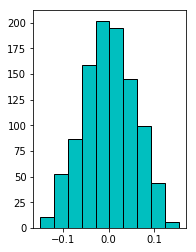

Гістограми при n =  12


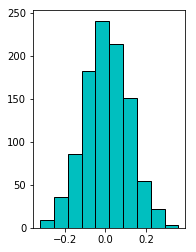

Гістограми при n =  48


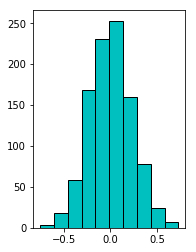

In [33]:
for i in (3, 12, 48):
    z = []
    j = 0
    while j < n:
        u = np.random.rand(i)
        z.append(gaussian1(u))
        j += 1
    drow1(i)

## Завдання №6

In [34]:
mu = 0
sigma = 1
n = 1000
k = 100
norm_rv = sts.norm(loc=mu, scale=sigma)
en = []
i = 0
while i < n:
    en.append(max(norm_rv.rvs(k)))
    i+=1

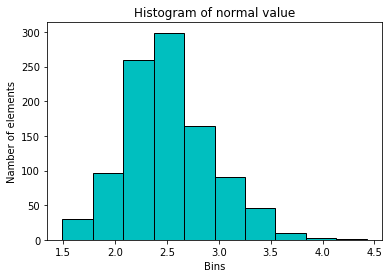

In [35]:
plt.title("Histogram of normal value")
plt.ylabel("Namber of elements")
plt.xlabel("Bins")
plt.hist(en,  histtype='bar', align='mid', color='c', label='Test score Data',edgecolor='black')
plt.show()

## Завдання №7

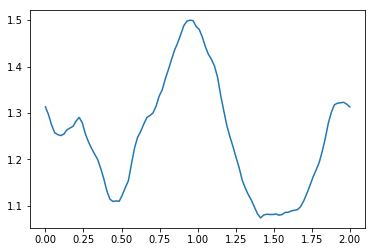

In [47]:
def gaus(t, x1, x2):
    k = [i**2 for i in range(M)]
    k = np.array(k)
    c = 1/(1+k*np.pi)
    l = [np.pi*i for i in range(M)]
    l = np.array(l)
    et = np.sum(x1*c*np.cos(l*t)+x2*c*np.sin(l*t))
    return et
M = 100
n = 100
T = 2
t = [round(i, 3) for i in np.linspace(0, T, 100)]
dt = t[1]

mu1 = 0
sigma1 = 1
norm_rv = sts.norm(loc=mu1, scale=sigma1)
x1 = norm_rv.rvs(M)
norm_rv2 = sts.norm(loc=mu1, scale=sigma1)
x2 = norm_rv2.rvs(M)
et = []
for i in t:
    et.append(gaus(i, x1, x2))
plt.plot(t, et)

# Завдання №8

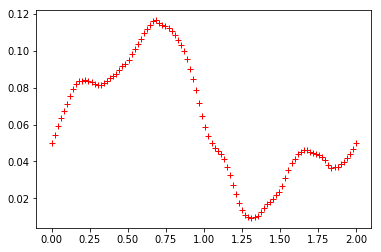

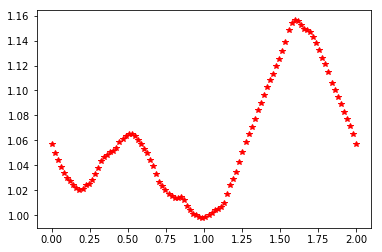

In [50]:
def char_et(n_proces):
    m_et = []
    for j in range (n_proces):
        norm_rv = sts.norm(loc=mu1, scale=sigma1)
        x1 = norm_rv.rvs(M)
        norm_rv2 = sts.norm(loc=mu1, scale=sigma1)
        x2 = norm_rv2.rvs(M)
        et = []
        for i in t:
            et.append(gaus(i, x1, x2))
        m_et.append(et)
    return m_et
n_proces = 100
m_et = char_et(n)

means, stds = np.mean(m_et, axis=0), np.std(m_et, axis=0)
len(means)
#  графік середньго
plt.subplot(111)
plt.plot(t, means, color="red", ls=' ', marker='+')
plt.show()
#Графік дисперсії
plt.subplot(111)
plt.plot(t, stds**2, color="red", ls=' ', marker='*')
plt.show()

In [48]:
ki_et = char_et(n_proces)
mean_i, std_i = np.mean(ki_et, axis=0), np.std(ki_et, axis=0)

ki_et = np.matrix(ki_et)
ki_et = np.transpose(ki_et)

lenght = len(ki_et)
p = (lenght, lenght)
correl = np.zeros(p)
for i in range(lenght):
    for j in range(lenght):
        correl[i, j] = np.sum(np.array(ki_et[i]-mean_i[i])*np.array(ki_et[j]-mean_i[j]))/(std_i[i]*std_i[j]*n_proces)        

correl

array([[1.        , 0.99982512, 0.99927054, ..., 0.9993826 , 0.99983095,
        1.        ],
       [0.99982512, 1.        , 0.99979926, ..., 0.99861462, 0.99933457,
        0.99982512],
       [0.99927054, 0.99979926, 1.        , ..., 0.99746634, 0.99846258,
        0.99927054],
       ...,
       [0.9993826 , 0.99861462, 0.99746634, ..., 1.        , 0.99984772,
        0.9993826 ],
       [0.99983095, 0.99933457, 0.99846258, ..., 0.99984772, 1.        ,
        0.99983095],
       [1.        , 0.99982512, 0.99927054, ..., 0.9993826 , 0.99983095,
        1.        ]])

# The End

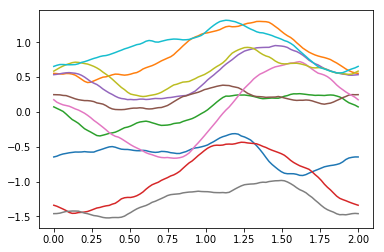

In [46]:
et = []
for j in range (10):
    norm_rv = sts.norm(loc=mu1, scale=sigma1)
    x1 = norm_rv.rvs(M)
    norm_rv2 = sts.norm(loc=mu1, scale=sigma1)
    x2 = norm_rv2.rvs(M)
    et = []
    for i in t:
        et.append(gaus(i, x1, x2))
    plt.plot(t, et)